In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import GridSpec
import matplotlib.gridspec as gridspec
import numpy as np
import glob
import pandas as pd
import math

import skimage
import skimage.io
from skimage.morphology import disk
from skimage.filters import rank

import seaborn as sns
plt.style.use('styleNB.mplstyle')

## Figure 1 related
- Demonstration that we can seperate out cells using our large-scale device.


In [2]:
df = pd.read_csv('../../data/migration_assays/migration_assays_summary.csv')

Text(0, 0.5, 'fraction of cells that\nsuccessfully migrate')

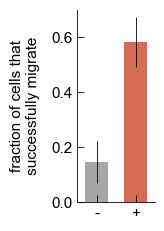

In [3]:
colors = ['#738FC1', '#7AA974', '#D56C55', '#EAC264', '#AB85AC', '#C9D7EE', '#E8B19D', '#DCECCB', '#D4C2D9']


fig, ax = plt.subplots(1,1,figsize = (1, 2.5))


df_temp = df[df.FBS_grad == False]
df_temp = df_temp[df_temp.fMLP_nM == 0]
df_temp = df_temp[df_temp.time_point_hr <= 2]
df_temp = df_temp[df_temp.time_point_hr > 1.0]
df_temp = df_temp[df_temp.format != '49mm_Galvo']

ax.bar(0, df_temp.frac_migrated.mean(), yerr = df_temp.frac_migrated.std(), 
        color = 'grey', width=0.6, alpha = 0.7)


df_temp = df[df['FBS_%'] == 5]
df_temp = df_temp[df_temp.FBS_grad == False] 
df_temp = df_temp[df_temp.time_point_hr == 2] 
df_temp = df_temp[df_temp.date >= 20201120] 
df_temp = df_temp[df_temp.format == '49mm_Galvo']

ax.bar(1, df_temp.frac_migrated.mean(), yerr = df_temp.frac_migrated.std(), 
        color = colors[2], width=0.6, label='+')

plt.ylim(0,0.7)
plt.xlim(-0.5,1.5)

ax.set_xticks([0,1])

ax.set_xticklabels(['-','+'])

plt.ylabel('fraction of cells that\nsuccessfully migrate')

# fig.savefig('../../figures/Figure1_frac_cells.pdf')

## Screen data - Full library data (Supplemental)
- log2fold-change plot
- Validation of a number of hits ; collagen 3D migration data. Plot the directed movement along E-field.

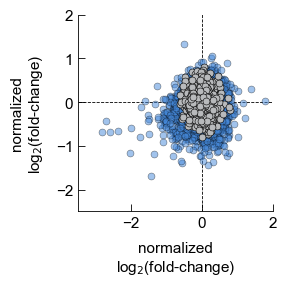

In [4]:
f, ax = plt.subplots(1, 1, figsize=(3,3))

# load in the prior 'undirected' genome-wide screen data from Belliveau et al. 2023 Nature Communications work.
df_0 = pd.read_csv('../../data/screen_summary/stats/20220516_screen_log2fold_diffs_tracketch_0_all_means_pvalue.csv')
# load in the data from the genome-wide galvanotaxis screen
df_galvo = pd.read_csv('../../data/screen_summary/stats/20220930_screen_log2fold_diffs_galvo_sgRNA_means_bestruns_original_analysis_pvalue.csv')

df_compare = pd.merge(df_0,
                      df_galvo,
                      on = 'gene')

ax.scatter(df_compare[~df_compare.gene.str.contains('CONTROL')].log2fold_diff_mean_x, 
            df_compare[~df_compare.gene.str.contains('CONTROL')].log2fold_diff_mean_y,          
            edgecolors = 'k', linewidths = 0.4, zorder = 5, label = None,
           color = '#4589DB', s = 25, alpha = 0.5)

ax.scatter(df_compare[df_compare.gene.str.contains('CONTROL')].log2fold_diff_mean_x, 
            df_compare[df_compare.gene.str.contains('CONTROL')].log2fold_diff_mean_y,          
            edgecolors = 'k', linewidths = 0.4, zorder = 10, label = None,
           color = '#B8BABC', s = 25, alpha = 1)

ax.hlines(0, -16, 5, linestyles = '--', color = 'k')
ax.vlines(0, -16, 5, linestyles = '--', color = 'k')

ax.set_xlim(-3.5,2)
ax.set_ylim(-2.5,2)

ax.set_xlabel('normalized\n'
                r'log$_{2}$(fold-change)')
ax.set_ylabel('normalized\n'
                r'log$_{2}$(fold-change)')

plt.tight_layout()
# f.savefig('../../figures/Figure1_supp_full_screen.pdf')

## Secondary 'sublibrary' screen data (main text)

- log2fold-change plot (main text figure)
- Validation of a number of hits ; collagen 3D migration data. Plot the directed movement along E-field.

In Adobe Illustrator, I'll want to identify notable genes.

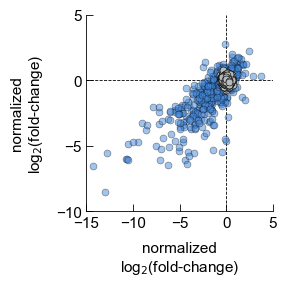

In [5]:
colors = ['#738FC1', '#7AA974', '#D56C55', '#EAC264', '#AB85AC', '#C9D7EE', '#E8B19D', '#DCECCB', '#D4C2D9']
color = ['#738FC1', '#7AA974', '#CC462F', '#EAC264', '#97459B',
         '#7CD6C4', '#D87E6A', '#BCDB8A', '#BF78C4', '#9653C1']

f, ax = plt.subplots(1, 1, figsize=(3,3))

###############################
# Comparison between galvanotaxis and undirected screens
###############################
df_p = pd.read_csv('../../data/screen_summary/stats/20230918_log2fold_galvo_sublib_means_No_efield_pvalue.csv')
df_p = pd.concat([df_p, pd.read_csv('../../data/screen_summary/stats/20230918_log2fold_galvo_sublib_means_Yes_efield_pvalue.csv')],
                 ignore_index = True)

df_temp1 = df_p[df_p.exp == 'Yes_efield']
df_temp2 = df_p[df_p.exp == 'No_efield']

df_temp = pd.merge(df_temp2, df_temp1, on = 'gene')

ax.scatter(df_temp[~df_temp.gene.str.contains('CONTROL')].log2fold_diff_mean_x, 
            df_temp[~df_temp.gene.str.contains('CONTROL')].log2fold_diff_mean_y,          
            edgecolors = 'k', linewidths = 0.4, zorder = 5, label = None,
           color = '#4589DB', s = 25, alpha = 0.5)

ax.scatter(df_temp[df_temp.gene.str.contains('CONTROL')].log2fold_diff_mean_x, 
            df_temp[df_temp.gene.str.contains('CONTROL')].log2fold_diff_mean_y,          
            edgecolors = 'k', linewidths = 0.4, zorder = 10, label = None,
           color = '#B8BABC', s = 25, alpha = 1)

ax.hlines(0, -16, 5, linestyles = '--', color = 'k')
ax.vlines(0, -16, 5, linestyles = '--', color = 'k')

ax.set_xlim(-15,5)
ax.set_ylim(-10,5)
ax.set_xticks([-15,-10,-5,0,5])
ax.set_yticks([-10,-5,0,5])


ax.set_xlabel('normalized\n'
                r'log$_{2}$(fold-change)')
ax.set_ylabel('normalized\n'
                r'log$_{2}$(fold-change)')

plt.tight_layout()
# f.savefig('../../figures/Figure1_screen.pdf')

## Validation of gene candidates via migration in 3D collagen (Supplemental)

In [6]:
###############################
# directionality calculation
# https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python
###############################
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)) 

#############################################
# standard error calculation using bootstrap
#############################################

# Number of replicatess
n_reps = 2000
rg = np.random.default_rng(3252)

def draw_bs_rep(data, func, rg):
    """Compute a bootstrap replicate from data."""
    bs_sample = rg.choice(data, size=len(data))
    return func(bs_sample)

In [10]:
f = glob.glob('../../data/processed_3D_tracking/20240*KD*.csv')[0]

df_kd = pd.read_csv(f)
df_kd = df_kd[['cell', 'frame', 'x', 'y', 'z', 'celltype', 'E_V_cm',
       'date', 'trial']]
df_kd.head()

,cell,frame,x,y,z,celltype,E_V_cm,date,trial
0,1,0,57.506802,45.252089,281.989460,sgControl,0,20230928,1
1,1,1,56.865492,44.927653,279.208073,sgControl,0,20230928,1
2,1,2,61.593141,45.467250,278.757336,sgControl,0,20230928,1
3,1,3,62.247696,44.733902,279.193371,sgControl,0,20230928,1
4,1,4,63.150576,44.385067,278.876199,sgControl,0,20230928,1


In [11]:
N = len(df_kd.celltype.unique())

ax_dict = dict(zip(df_kd.celltype.unique(), np.arange(N)))

In [12]:
df_kd.celltype.unique()

array(['sgControl', 'sgGNPNAT1', 'sgTMEM154', 'sgUXS1', 'sgVPS13B'],
      dtype=object)

In [14]:
kd_line_order_dict = {'sgControl' : 0, 
                      'sgTMEM154' : 1,
                      'sgVPS13B' : 2,
                      'sgUXS1' : 3,
                      'sgGNPNAT1' : 4}

3
sgControl
0.02460104549890445
0.03427443594538768
0.03291469861307892
0.026504962262516057
total cell count 839
sgGNPNAT1
0.015317660917035405
0.007065580516662606
0.018749155060192018
total cell count 495
sgTMEM154
0.019858804281652976
0.0127739905713251
0.014764111807696025
total cell count 846
sgUXS1
0.012991230063612457
0.013915685844006738
0.012833790765174059
total cell count 586
sgVPS13B
0.014472630406869203
0.015308327750727956
0.017557252188554116
total cell count 739


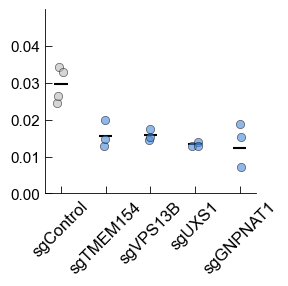

In [31]:
fig, ax = plt.subplots(1,1, figsize = (3, 3))

###################
# average speed along E-field direction
###################
for E, df_ in df_kd[df_kd.E_V_cm == 3].groupby('E_V_cm'):
    print(E)
    
    for c, df_temp in df_.groupby('celltype'):
        print(c)
        if 'Control' in c:
            color = '#B8BABC'
        else:
            color = '#4589DB'
        
        ind = kd_line_order_dict[c]
        speed_all = []
        
        for g, d in df_temp.groupby(['date', 'trial'], sort=False):
            speed_prep = []
            for cell, d_ in d.groupby('cell'):
                if len(d_.frame.unique()) > 16:
                    speed_cell = []
                    for t in np.arange(d_.frame.min(), d_.frame.max(), 3)[1:]:
                        vec_t1 = [d_[d_.frame == t].x.values[0] - d_[d_.frame == t-3].x.values[0]]
                        speed_cell = np.append(speed_cell, (vec_t1[0]) / (3*60))

                speed_prep = np.append(speed_prep, np.mean(speed_cell)) 

            # Add random jitter to the x-coordinate
            jitter = np.random.uniform(-0.1, 0.1)
            x_position = kd_line_order_dict[c] + jitter
            
            ax.errorbar(x_position, np.mean(speed_prep),
                                      markersize=6, marker='o', color=color,
                                      markeredgecolor='k',
                                      markeredgewidth=0.5,
                                      lw=0.5,
                                      alpha=0.6, zorder=10)   

            speed_all = np.append(speed_all, speed_prep)

            print(np.mean(speed_prep))

        ax.hlines(speed_all.mean(), kd_line_order_dict[c]-0.15, kd_line_order_dict[c]+0.15, zorder=10, lw=1.5, color='k')
        print('total cell count' , len(speed_all))

        
        #ax.set_xlim(-0.5, 2.5)
        #ax.xaxis.set_visible(False)
        ax.set_ylim(0, 0.05)
        ax.set_yticks([0.0, 0.01,0.02,0.03,0.04])
        #ax.set_ylabel('average speed along e-field direction\n' + r'($\mu$m/s)')


new_labels = list(kd_line_order_dict) #list(df_kd.celltype.unique())
ax.set_xticks(np.arange(len(df_kd.celltype.unique())))
ax.set_xticklabels(new_labels, fontsize = 12)

# Rotate tick
plt.xticks(rotation=45)

plt.tight_layout()

# fig.savefig('../../figures/Figure1_Supp_kd_lines_updated.pdf')

In [28]:
sgControl_val = [0.02460104549890445, 0.03427443594538768, 0.03291469861307892, 0.026504962262516057]
sgGNPNAT1_val = [0.015317660917035405, 0.007065580516662606, 0.018749155060192018]
sgTMEM154_val = [0.019858804281652976, 0.0127739905713251, 0.014764111807696025]
sgUXS1_val = [0.012991230063612457, 0.013915685844006738, 0.012833790765174059]
sgVPS13B_val = [0.014472630406869203,0.015308327750727956, 0.017557252188554116]
    
from statsmodels.stats.multicomp import pairwise_tukeyhsd
a = sgControl_val
c = sgGNPNAT1_val
d = sgTMEM154_val
e = sgUXS1_val
f = sgVPS13B_val

#create DataFrame to hold data
df_stats = pd.DataFrame()

# Collect data in a list of dictionaries for the first set
data_a = [{'group': 'WT', 'speed': val} for val in a]
df_stats = pd.DataFrame(data_a)

# Collect data in a list of dictionaries for the second set
data_c = [{'group': 'GNPNAT1', 'speed': val} for val in c]
df_c = pd.DataFrame(data_c)
df_stats = pd.concat([df_stats, df_c], ignore_index=True)

# Collect data in a list of dictionaries for the second set
data_d = [{'group': 'TMEM154', 'speed': val} for val in d]
df_d = pd.DataFrame(data_d)
df_stats = pd.concat([df_stats, df_d], ignore_index=True)

# Collect data in a list of dictionaries for the second set
data_e = [{'group': 'UXS1', 'speed': val} for val in e]
df_e = pd.DataFrame(data_e)
df_stats = pd.concat([df_stats, df_e], ignore_index=True)

# Collect data in a list of dictionaries for the second set
data_f = [{'group': 'VPS13B', 'speed': val} for val in f]
df_f = pd.DataFrame(data_f)
df_stats = pd.concat([df_stats, df_f], ignore_index=True)

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df_stats['speed'],
                          groups=df_stats['group'],
                          alpha=0.05)

# #display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
GNPNAT1 TMEM154   0.0021 0.9637 -0.0084 0.0125  False
GNPNAT1    UXS1  -0.0005 0.9999 -0.0109   0.01  False
GNPNAT1  VPS13B   0.0021 0.9649 -0.0084 0.0125  False
GNPNAT1      WT   0.0159  0.002  0.0061 0.0256   True
TMEM154    UXS1  -0.0026 0.9281  -0.013 0.0079  False
TMEM154  VPS13B     -0.0    1.0 -0.0105 0.0104  False
TMEM154      WT   0.0138 0.0058   0.004 0.0235   True
   UXS1  VPS13B   0.0025 0.9299 -0.0079  0.013  False
   UXS1      WT   0.0163 0.0016  0.0066 0.0261   True
 VPS13B      WT   0.0138 0.0058   0.004 0.0236   True
-----------------------------------------------------


### Also take a look at speed

3
sgControl
0.06193086295452949
0.07575057528442707
0.07214983939812676
0.0648946020089616
total cell count 839
sgGNPNAT1
0.055462949168666585
0.048470982195806346
0.06131167760676271
total cell count 495
sgTMEM154
0.07340297833866956
0.06462589433853688
0.07079239513362391
total cell count 846
sgUXS1
0.05419504794535767
0.055305191194127294
0.054815188669403506
total cell count 586
sgVPS13B
0.05632287179352116
0.06917233837266044
0.06945622036776494
total cell count 739


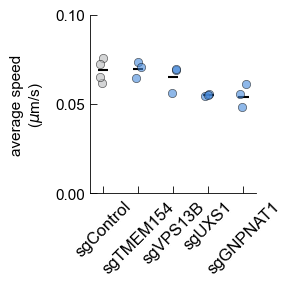

In [25]:
fig, ax = plt.subplots(1,1, figsize = (3, 3))
###############
# speed
###############
for E, df_ in df_kd[df_kd.E_V_cm == 3].groupby('E_V_cm'):
    print(E)
    
    for c, df_temp in df_.groupby('celltype'):
        print(c)
        if 'Control' in c:
            color = '#B8BABC'
        else:
            color = '#4589DB'
        
        ind = kd_line_order_dict[c]
        speed_all = []
        
        for g, d in df_temp.groupby(['date', 'trial'], sort=False):
            speed_prep = []
            for cell, d_ in d.groupby('cell'):
                if len(d_.frame.unique()) > 16:
                    speed_cell = []
                    for t in np.arange(d_.frame.min(), d_.frame.max(), 3)[1:]:
                        vec_t1 = [d_[d_.frame == t].x.values[0] - d_[d_.frame == t-3].x.values[0],
                                  d_[d_.frame == t].y.values[0] - d_[d_.frame == t-3].y.values[0],
                                  d_[d_.frame == t].z.values[0] - d_[d_.frame == t-3].z.values[0]]
                        speed_cell = np.append(speed_cell, np.sqrt(vec_t1[0]**2 + vec_t1[1]**2 + vec_t1[2]**2) / (3*60))

                speed_prep = np.append(speed_prep, np.mean(speed_cell)) 

            # Add random jitter to the x-coordinate
            jitter = np.random.uniform(-0.1, 0.1)
            x_position = kd_line_order_dict[c] + jitter
            
            ax.errorbar(x_position, np.mean(speed_prep),
                                      markersize=6, marker='o', color=color,
                                      markeredgecolor='k',
                                      markeredgewidth=0.5,
                                      lw=0.5,
                                      alpha=0.6, zorder=10)   

            speed_all = np.append(speed_all, speed_prep)
            print(np.mean(speed_prep))


        ax.hlines(speed_all.mean(), kd_line_order_dict[c]-0.15, kd_line_order_dict[c]+0.15, zorder=10, lw=1.5, color='k')

        ax.set_ylim(0, 0.1)
        ax.set_yticks([0.0, 0.05, 0.1])
        ax.set_ylabel('average speed\n' + r'($\mu$m/s)')
        print('total cell count' , len(speed_all))

new_labels = list(kd_line_order_dict) 
ax.set_xticks(np.arange(len(df_kd.celltype.unique())))
ax.set_xticklabels(new_labels, fontsize = 12)

# Rotate tick
plt.xticks(rotation=45)

plt.tight_layout()

In [27]:
sgControl_val = [0.06193086295452949, 0.07575057528442707, 0.07214983939812676, 0.0648946020089616]
sgGNPNAT1_val = [0.055462949168666585, 0.048470982195806346, 0.06131167760676271]
sgTMEM154_val = [0.07340297833866956, 0.06462589433853688, 0.07079239513362391]
sgUXS1_val = [0.05419504794535767, 0.055305191194127294, 0.054815188669403506]
sgVPS13B_val = [0.05632287179352116, 0.06917233837266044, 0.06945622036776494]

from statsmodels.stats.multicomp import pairwise_tukeyhsd
a = sgControl_val
c = sgGNPNAT1_val
d = sgTMEM154_val
e = sgUXS1_val
f = sgVPS13B_val

#create DataFrame to hold data
df_stats = pd.DataFrame()

# Collect data in a list of dictionaries for the first set
data_a = [{'group': 'WT', 'speed': val} for val in a]
df_stats = pd.DataFrame(data_a)

# Collect data in a list of dictionaries for the second set
data_c = [{'group': 'GNPNAT1', 'speed': val} for val in c]
df_c = pd.DataFrame(data_c)
df_stats = pd.concat([df_stats, df_c], ignore_index=True)

# Collect data in a list of dictionaries for the second set
data_d = [{'group': 'TMEM154', 'speed': val} for val in d]
df_d = pd.DataFrame(data_d)
df_stats = pd.concat([df_stats, df_d], ignore_index=True)

# Collect data in a list of dictionaries for the second set
data_e = [{'group': 'UXS1', 'speed': val} for val in e]
df_e = pd.DataFrame(data_e)
df_stats = pd.concat([df_stats, df_e], ignore_index=True)

# Collect data in a list of dictionaries for the second set
data_f = [{'group': 'VPS13B', 'speed': val} for val in f]
df_f = pd.DataFrame(data_f)
df_stats = pd.concat([df_stats, df_f], ignore_index=True)

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df_stats['speed'],
                          groups=df_stats['group'],
                          alpha=0.05)

# #display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
GNPNAT1 TMEM154   0.0145 0.0605 -0.0005 0.0296  False
GNPNAT1    UXS1  -0.0003    1.0 -0.0154 0.0148  False
GNPNAT1  VPS13B   0.0099 0.2761 -0.0052  0.025  False
GNPNAT1      WT   0.0136 0.0602 -0.0005 0.0277  False
TMEM154    UXS1  -0.0148 0.0543 -0.0299 0.0002  False
TMEM154  VPS13B  -0.0046 0.8536 -0.0197 0.0104  False
TMEM154      WT  -0.0009 0.9995  -0.015 0.0132  False
   UXS1  VPS13B   0.0102 0.2517 -0.0049 0.0253  False
   UXS1      WT   0.0139 0.0537 -0.0002  0.028  False
 VPS13B      WT   0.0037 0.9096 -0.0104 0.0178  False
-----------------------------------------------------
